In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
# set data pipline and hyper-parameters
data = load_iris()
shuffledIndices = np.random.permutation(len(data.target))
data.data, data.target = data.data[shuffledIndices], data.target[shuffledIndices]
trainX, testX = data.data[:100,1:3], data.data[100:,1:3]
trainY, testY = data.target[:100], data.target[100:]

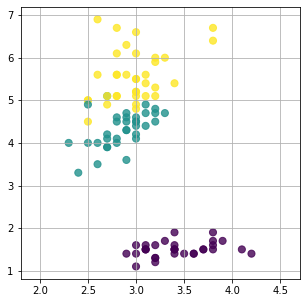

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(x=trainX[:,0], y=trainX[:,1], s=50, alpha=0.8, c=trainY)
plt.xlim(trainX[:,0].min() - 0.5, trainX[:,0].max() + 0.5)
plt.grid()
plt.show()

In [4]:
# define activation functions
sigmoid = lambda x, e=2.7182: 1 / (1 + e**(-x))
reLu = lambda x: np.array([max(0, obj) for obj in x])
seLu = lambda x, e=2.7182, a=1.0507: np.array([obj if obj >= 0 else a * (e**obj - 1) for obj in x])

# activation fn dictionary
actDict = {"sigmoid":sigmoid,"reLu":reLu,"seLu":seLu}

In [5]:
class Perceptron:
    def __init__(self, trainX, trainY, target):
        self.target = target
        self.weight = np.random.rand(trainX.shape[1])
        self.trainY = np.array([1 if self.target == i else 0 for i in trainY])
        
    def iterations(self, name, iterations=10000, lr=0.01):
        for epoch in range(iterations):
            activHX = actDict[name](np.dot(trainX, self.weight))
            self.weight -= (lr / trainX.shape[0]) * np.dot(trainX.T, (activHX - self.trainY))
        # for
        
    def predict(self, case):
        if type(case) == list:
            case = np.array(case)
    
        return np.dot(case, self.weight)
    def predict_(self, case):
        if type(case) == list:
            case = np.array(case)
    
        return True if np.dot(case, self.weight) > 0.5 else False

In [6]:
# make perceptrons
firstPerc = Perceptron(trainX, trainY, 0)
secondPerc = Perceptron(trainX, trainY, 1)
thirdPerc = Perceptron(trainX, trainY, 2)

# learning
firstPerc.iterations('seLu')
secondPerc.iterations('seLu')
thirdPerc.iterations('seLu')

In [7]:
softmax = lambda case: np.array([np.exp(obj) / np.sum(np.exp(case)) for obj in case])

In [8]:
# random
index = random.randrange(len(testY))
prediction = softmax(np.array([firstPerc.predict(testX[index,:]), secondPerc.predict(testX[index,:]), thirdPerc.predict(testX[index,:])]))
print(f"{prediction}")
print(f"pred: {np.argmax(prediction)}, actual target: {testY[index]}")

[0.19796368 0.35406545 0.44797087]
pred: 2, actual target: 2


In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(x=trainX[:,0], y=trainX[:,1], s=50, alpha=1, c=trainY)
plt.scatter(x=testX[index,0], y=testX[index,1], c='r', s=200, marker='+')
plt.xlim(trainX[:,0].min() - 0.5, trainX[:,0].max() + 0.5)
plt.grid()
cb = plt.colorbar()
cb.ax.set_xticklabels(

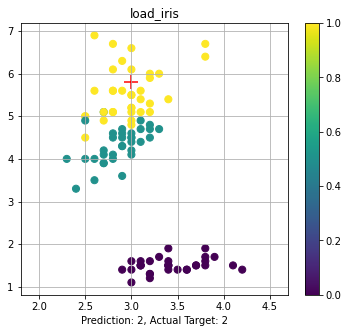

In [48]:
plt.figure(figsize=(6,5))
plt.scatter(x=trainX[:,0], y=trainX[:,1], s=50, alpha=1, c=trainY)
plt.scatter(x=testX[index,0], y=testX[index,1], c='r', s=200, marker='+')
plt.xlim(trainX[:,0].min() - 0.5, trainX[:,0].max() + 0.5)
plt.grid()
plt.colorbar()
plt.xlabel(f"Prediction: {np.argmax(prediction)}, Actual Target: {testY[index]}")
plt.title("load_iris")
plt.show()